# I. INTRODUCTION

Алгоритмы машинного обучения широко распространены в задачах распознавания образов, в рекомендательных системах, учитывающих персонализированные данные пользователя, определении тематической направленности текстов и многих других прикладных областях. Принятие решения в условиях работы с недетерминированной системой обязательно сопряжено с ошибками. Соответственно каждый алгоритм может быть рассмотрен с точки зрения того, как часто или как сильно он ошибается. Здесь и возникает задача оценки качества алгоритма.

Для обозначения способов оценить качество работы алгоритма, как правило, используется термин **метрика**. Метрикой, строго говоря, называется числовая функция, удовлетворяющая аксиомам *тождества, симметрии и, так называемому неравенству треугольника* []. Иными словами, метрика определяет способ измерить расстояние между объектами, входящими в некоторое множество, или пространство. В частности, если говорить об алгоритмах, то за расстояние можно принять модуль разности между средним показателем ошибочности алгоритмов, однако зачастую за показатель качества берется расстояние между разрабатываемым и, в некотором смысле, идеальным алгоритмом (под идеальным здесь понимается алгоритм, не совершающим ошибок при классификации объектов).

Очевидно, что выбор метрик зависит от постановки задачи и от того, какие алгоритмы используются для ее решения. В данной статье рассматриваются различные метрики, используемые в задачах бинарной и многоклассовой классификации, проводится обучение нескольких классификаторов на наборе данных, представляющем пиксельное описание рукописных цифр [], приводятся графики метрик, показывающие то, как меняется качество работы в зависимости от используемого классификатора.

# II. COMMON CLASSIFICATION TASK DESCRIPTION

В наиболее общей постановке задачи классификации говорят об **X** — множестве описаний объектов, **Y** — конечном множестве номеров	, или меток классов. Считается, что есть некоторая целевая зависимость, представимая в виде **y: X→Y**. Значения данной зависимости известны только на элементах множества описаний объектов. Под классификатором здесь понимается некое отображение  **a: X→Y**. Как правило, формируемое отображение обладает определенным набором параметров, значения которых варьируются и, соответственно, влияют на качество работы. Таким образом, обучение классификатора сводится к тому чтобы подобрать значения параметров таким образом, чтобы минимизировать (или наоборот) значение метрик качества, установленных в решаемой задаче.

In [379]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_digits

import matplotlib.pyplot as plt
import seaborn as sns

b_c = load_breast_cancer()
d = load_digits()

print b_c.data.shape[0]
print d.data.shape[0]

print b_c.DESCR
print d.DESCR

X_b_c_train, X_b_c_test, y_b_c_train, y_b_c_test = train_test_split(
    b_c.data,
    b_c.target,
    train_size=0.7,
    random_state=0
)
X_d_train, X_d_test, y_d_train, y_d_test = train_test_split(
    d.data,
    d.target,
    train_size=0.01,
    random_state=0
)

def error_matrix(a_n, y_b_c):
    return [[
        sum([int(a == y and a == 0) for a, y in zip(a_n, y_b_c)]),
        sum([int(a != y and a == 0) for a, y in zip(a_n, y_b_c)])],
    [
        sum([int(a != y and a == 1) for a, y in zip(a_n, y_b_c)]),
        sum([int(a == y and a == 1) for a, y in zip(a_n, y_b_c)])
    ]]

569
1797
Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.


# III. QUALITY METRICS OF BINARY CLASSIFICATORS

Линейный классификатор 0.906433 0.979592 0.761905
Решающее дерево 0.912281 0.842857 0.936508
Случайный лес 0.94152 0.907692 0.936508
К-ближайших соседей 0.947368 0.921875 0.936508


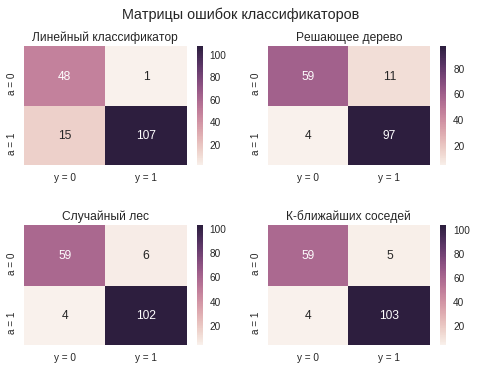

In [375]:
B_C_SGDClassifier = SGDClassifier(random_state=0)
B_C_DecisionTreeClassifier = DecisionTreeClassifier(random_state=0)
B_C_RandomForestClassifier = RandomForestClassifier(random_state=0)
B_C_KNeighborsClassifier = KNeighborsClassifier()


B_C_SGDClassifier.fit(X_b_c_train, y_b_c_train)
B_C_DecisionTreeClassifier.fit(X_b_c_train, y_b_c_train)
B_C_RandomForestClassifier.fit(X_b_c_train, y_b_c_train)
B_C_KNeighborsClassifier.fit(X_b_c_train, y_b_c_train)

a_1 = B_C_SGDClassifier.predict(X_b_c_test)
a_2 = B_C_DecisionTreeClassifier.predict(X_b_c_test)
a_3 = B_C_RandomForestClassifier.predict(X_b_c_test)
a_4 = B_C_KNeighborsClassifier.predict(X_b_c_test)

accuracy_score_a_1 = round(accuracy_score(y_b_c_test, a_1), 6)
accuracy_score_a_2 = round(accuracy_score(y_b_c_test, a_2), 6)
accuracy_score_a_3 = round(accuracy_score(y_b_c_test, a_3), 6)
accuracy_score_a_4 = round(accuracy_score(y_b_c_test, a_4), 6)

precision_score_a_1 = round(precision_score(y_b_c_test, a_1, pos_label=0), 6)
precision_score_a_2 = round(precision_score(y_b_c_test, a_2, pos_label=0), 6)
precision_score_a_3 = round(precision_score(y_b_c_test, a_3, pos_label=0), 6)
precision_score_a_4 = round(precision_score(y_b_c_test, a_4, pos_label=0), 6)

recall_score_a_1 = round(recall_score(y_b_c_test, a_1, pos_label=0), 6)
recall_score_a_2 = round(recall_score(y_b_c_test, a_2, pos_label=0), 6)
recall_score_a_3 = round(recall_score(y_b_c_test, a_3, pos_label=0), 6)
recall_score_a_4 = round(recall_score(y_b_c_test, a_4, pos_label=0), 6)

print u"Линейный классификатор", accuracy_score_a_1, precision_score_a_1, recall_score_a_1
print u"Решающее дерево", accuracy_score_a_2, precision_score_a_2, recall_score_a_2
print u"Случайный лес", accuracy_score_a_3, precision_score_a_3, recall_score_a_3
print u"К-ближайших соседей", accuracy_score_a_4, precision_score_a_4, recall_score_a_4

error_matrix_1 = error_matrix(a_1, y_b_c_test)
error_matrix_2 = error_matrix(a_2, y_b_c_test)
error_matrix_3 = error_matrix(a_3, y_b_c_test)
error_matrix_4 = error_matrix(a_4, y_b_c_test)

f, axarr = plt.subplots(2, 2, sharex=False, sharey=False)
plt.suptitle(u"Матрицы ошибок классификаторов")
f.subplots_adjust(hspace=.5)
axarr[0][0].title.set_text(u"Линейный классификатор")
axarr[0][1].title.set_text(u"Решающее дерево")
axarr[1][0].title.set_text(u"Случайный лес")
axarr[1][1].title.set_text(u"К-ближайших соседей")
sns.heatmap(
    error_matrix_1,
    ax=axarr[0][0],
    annot=True,
    fmt="d",
    xticklabels=('y = 0', 'y = 1'),
    yticklabels=('a = 0', 'a = 1')
)
sns.heatmap(
    error_matrix_2,
    ax=axarr[0][1],
    annot=True, fmt="d",
    xticklabels=('y = 0', 'y = 1'),
    yticklabels=('a = 0', 'a = 1')
)
sns.heatmap(
    error_matrix_3,
    ax=axarr[1][0],
    annot=True, fmt="d",
    xticklabels=('y = 0', 'y = 1'),
    yticklabels=('a = 0', 'a = 1')
)
sns.heatmap(
    error_matrix_4,
    ax=axarr[1][1],
    annot=True, fmt="d",
    xticklabels=('y = 0', 'y = 1'),
    yticklabels=('a = 0', 'a = 1')
)
plt.show()

# IV. QUALITY METRICS OF MULTI-CLASS CLASSIFICATORS

0.486517
0.272472
0.327528
0.417978


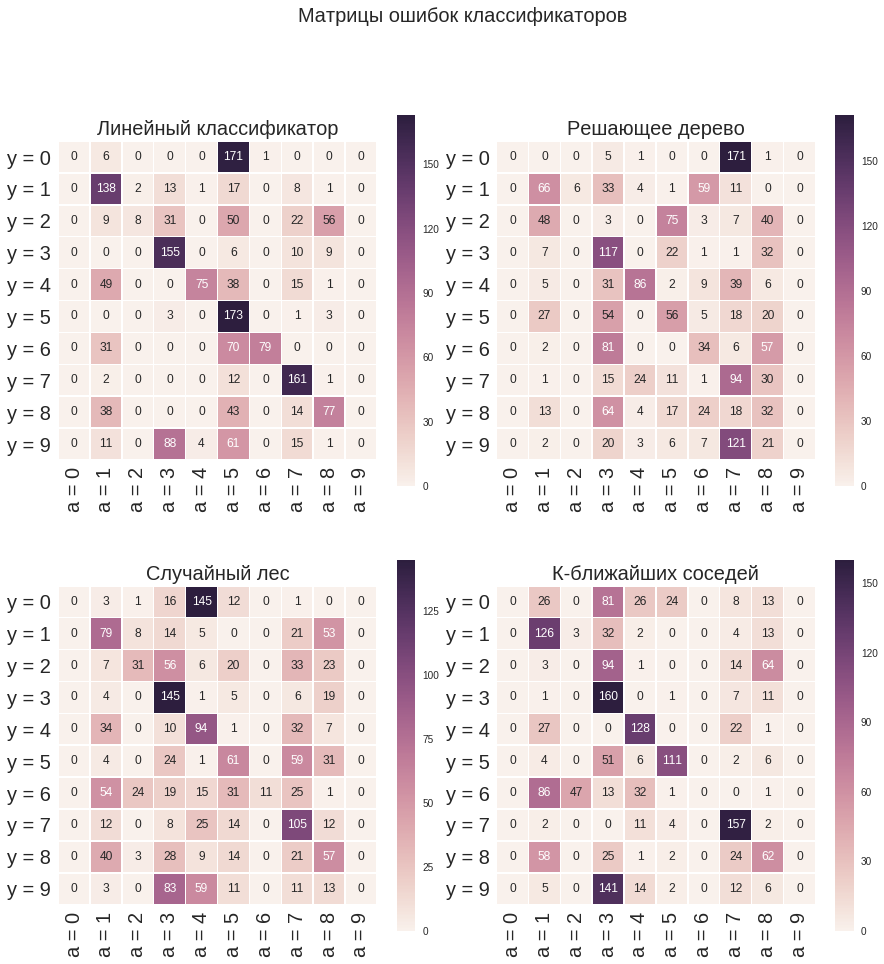

In [378]:
D_SGDClassifier = SGDClassifier(random_state=0)
D_DecisionTreeClassifier = DecisionTreeClassifier(random_state=0)
D_RandomForestClassifier = RandomForestClassifier(random_state=0)
D_KNeighborsClassifier = KNeighborsClassifier()

D_SGDClassifier.fit(X_d_train, y_d_train)
D_DecisionTreeClassifier.fit(X_d_train, y_d_train)
D_RandomForestClassifier.fit(X_d_train, y_d_train)
D_KNeighborsClassifier.fit(X_d_train, y_d_train)

a_1 = D_SGDClassifier.predict(X_d_test)
a_2 = D_DecisionTreeClassifier.predict(X_d_test)
a_3 = D_RandomForestClassifier.predict(X_d_test)
a_4 = D_KNeighborsClassifier.predict(X_d_test)

print round(accuracy_score(y_d_test, a_1), 6)
print round(accuracy_score(y_d_test, a_2), 6)
print round(accuracy_score(y_d_test, a_3), 6)
print round(accuracy_score(y_d_test, a_4), 6)

error_matrix_1 = confusion_matrix(y_d_test, a_1)
error_matrix_2 = confusion_matrix(y_d_test, a_2)
error_matrix_3 = confusion_matrix(y_d_test, a_3)
error_matrix_4 = confusion_matrix(y_d_test, a_4)

yticklabels=('y = 0', 'y = 1', 'y = 2', 'y = 3', 'y = 4', 'y = 5', 'y = 6', 'y = 7', 'y = 8', 'y = 9')
xticklabels=('a = 0', 'a = 1', 'a = 2', 'a = 3', 'a = 4', 'a = 5', 'a = 6', 'a = 7', 'a = 8', 'a = 9')

f, ((axar1, axar2), (axar3, axar4)) = plt.subplots(2, 2, figsize=(15,15))
plt.suptitle(u"Матрицы ошибок классификаторов", fontsize=20)
f.subplots_adjust(hspace=.2, wspace=.1)
plt.yticks(rotation='horizontal')
axar1.title.set_text(u"Линейный классификатор")
axar2.title.set_text(u"Решающее дерево")
axar3.title.set_text(u"Случайный лес")
axar4.title.set_text(u"К-ближайших соседей")

axar1.title.set_fontsize(20)
axar2.title.set_fontsize(20)
axar3.title.set_fontsize(20)
axar4.title.set_fontsize(20)

g = sns.heatmap(
    error_matrix_1,
    ax=axar1,
    annot=True, fmt="d",
    xticklabels=xticklabels,
    yticklabels=yticklabels,
    linewidths=.5,
    square=True
)
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 20)
g.set_xticklabels(g.get_xticklabels(), rotation = 'vertical', fontsize = 20)
g = sns.heatmap(
    error_matrix_2,
    ax=axar2,
    annot=True, fmt="d",
    xticklabels=xticklabels,
    yticklabels=yticklabels,
    linewidths=.5,
    square=True
)
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 20)
g.set_xticklabels(g.get_xticklabels(), rotation = 'vertical', fontsize = 20)
g = sns.heatmap(
    error_matrix_3,
    ax=axar3,
    annot=True, fmt="d",
    xticklabels=xticklabels,
    yticklabels=yticklabels,
    linewidths=.5,
    square=True
)
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 20)
g.set_xticklabels(g.get_xticklabels(), rotation = 'vertical', fontsize = 20)
g = sns.heatmap(
    error_matrix_4,
    ax=axar4,
    annot=True, fmt="d",
    xticklabels=xticklabels,
    yticklabels=yticklabels,
    linewidths=.5,
    square=True
)
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 20)
g.set_xticklabels(g.get_xticklabels(), rotation = 'vertical', fontsize = 20)
plt.show()

# V. CONCLUSION

# VI. REFERENCES